<a href="https://colab.research.google.com/github/Galal-pic/Data-analysis-workshop-projects/blob/main/Random_forest_final_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk --quiet
!pip install spacy==2.3.5 --quiet
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for spacy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for spacy
ERROR: Could not build wheels for spacy, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 75.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 39.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following 

In [ ]:
!pip install pytesseract --quiet
!pip install pyresparser --quiet
!pip install python-docx  --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 1.6 MB/s eta 0:00:00


##`import libs`

In [ ]:
#import normal libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
import ast
sns.set_style('darkgrid')
# import NLP libs
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import spacy
spacy_model = spacy.load('en_core_web_sm')
# import Text exteact libs
from textblob import Word
#from pyresparser import ResumeParser
from docx import Document
# import Vectorization libs
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from sklearn.decomposition import TruncatedSVD
# import ML libs
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


##`import data from Drive`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_skills = pd.read_csv('/content/drive/MyDrive/data/job_data_with_skills_v1.csv')
df_resume = pd.read_csv('/content/drive/MyDrive/data/UpdatedResumeDataSet.csv')
df_skills.head(5)

,Job_title,Job_link,Job_description,Keyword,skills,way_2_skills,combined
0,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,We looking DevOps Engineer join team develop s...,scrab_ddata,"['engineer', 'unwanted traffic', 'infrastructu...","['System', 'Analyze', 'Policies', 'Debugging',...","['engineer', 'unwanted traffic', 'infrastructu..."
1,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Who We Are We owned funded one Egypt renowned ...,scrab_ddata,"['perspectives', 'strong focus scalability sec...","['Technical', 'Linux', 'Workflow', 'Lifecycle'...","['perspectives', 'strong focus scalability sec..."
2,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Wind IS Company Oracle Partner Egypt KSA UAE h...,scrab_ddata,"['development', 'engineer', 'Job Requirements ...","['System', 'Website', 'Design', 'Engineering',...","['development', 'engineer', 'Job Requirements ..."
3,Cloud Infrastructure Engineer,https://eg.linkedin.com/jobs/view/cloud-infras...,Who We Are We owned funded one Egypt renowned ...,scrab_ddata,"['related', 'perspectives', 'big stay', 'suit'...","['Hardware', 'Dhcp', 'Linux', 'Cloud', 'Vmware...","['related', 'perspectives', 'big stay', 'suit'..."
4,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,About Axis We believe financial services acces...,scrab_ddata,['Jenkins CD Bambop CircleCI Git Action Gitlab...,"['Automation', 'Ansible', 'Docker', 'Security'...",['Jenkins CD Bambop CircleCI Git Action Gitlab...


In [ ]:
df_resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# delete unused columns
columns = ['Job_title','Job_description','skills','way_2_skills','combined']
df_skills  = df_skills[columns]
df_skills.head()

,Job_title,Job_description,skills,way_2_skills,combined
0,DevOps Engineer,We looking DevOps Engineer join team develop s...,"['engineer', 'unwanted traffic', 'infrastructu...","['System', 'Analyze', 'Policies', 'Debugging',...","['engineer', 'unwanted traffic', 'infrastructu..."
1,DevOps Engineer,Who We Are We owned funded one Egypt renowned ...,"['perspectives', 'strong focus scalability sec...","['Technical', 'Linux', 'Workflow', 'Lifecycle'...","['perspectives', 'strong focus scalability sec..."
2,DevOps Engineer,Wind IS Company Oracle Partner Egypt KSA UAE h...,"['development', 'engineer', 'Job Requirements ...","['System', 'Website', 'Design', 'Engineering',...","['development', 'engineer', 'Job Requirements ..."
3,Cloud Infrastructure Engineer,Who We Are We owned funded one Egypt renowned ...,"['related', 'perspectives', 'big stay', 'suit'...","['Hardware', 'Dhcp', 'Linux', 'Cloud', 'Vmware...","['related', 'perspectives', 'big stay', 'suit'..."
4,DevOps Engineer,About Axis We believe financial services acces...,['Jenkins CD Bambop CircleCI Git Action Gitlab...,"['Automation', 'Ansible', 'Docker', 'Security'...",['Jenkins CD Bambop CircleCI Git Action Gitlab...


##`Discover the class`

In [ ]:
count_title = df_skills['Job_title'].value_counts().reset_index()
number_of_title = len(df_skills['Job_title'].unique())
print('number of jobs  = ', number_of_title)
print('*'*50)
count_title

number of jobs  =  10271
**************************************************


,index,Job_title
0,Project Manager,519
1,Data Analyst,418
2,Software Developer,140
3,Software Engineer,120
4,Embedded Software Engineer,120
...,...,...
10265,Senior Hardware Design Engineer,1
10266,nd Line Engineer Rollout Deployment,1
10267,Hydrogen Electrical Design Engineer,1
10268,Process Safety Engineer Process Engineer,1


In [ ]:
columns = count_title['index'][0:25]
columns = list(columns.values)
df_skills = df_skills[df_skills['Job_title'].isin(columns)]
df_skills

,Job_title,Job_description,skills,way_2_skills,combined
0,DevOps Engineer,We looking DevOps Engineer join team develop s...,"['engineer', 'unwanted traffic', 'infrastructu...","['System', 'Analyze', 'Policies', 'Debugging',...","['engineer', 'unwanted traffic', 'infrastructu..."
1,DevOps Engineer,Who We Are We owned funded one Egypt renowned ...,"['perspectives', 'strong focus scalability sec...","['Technical', 'Linux', 'Workflow', 'Lifecycle'...","['perspectives', 'strong focus scalability sec..."
2,DevOps Engineer,Wind IS Company Oracle Partner Egypt KSA UAE h...,"['development', 'engineer', 'Job Requirements ...","['System', 'Website', 'Design', 'Engineering',...","['development', 'engineer', 'Job Requirements ..."
4,DevOps Engineer,About Axis We believe financial services acces...,['Jenkins CD Bambop CircleCI Git Action Gitlab...,"['Automation', 'Ansible', 'Docker', 'Security'...",['Jenkins CD Bambop CircleCI Git Action Gitlab...
5,DevOps Engineer,Envision Employment Solutions currently look D...,"['DevOps Engineer role', 'repeat occurrences',...","['Automation', 'System', 'Docker', 'Engineerin...","['DevOps Engineer role', 'repeat occurrences',..."
...,...,...,...,...,...
15986,Quantity Surveyor,Apply A prestigious multi disciplinary constru...,"['full cost management role', 'development', '...","['Construction', 'Healthcare']","['full cost management role', 'development', '..."
16131,Software Engineer,Design develop test deploy maintain improve so...,"['development', 'Unix Linux', 'test', 'limited...","['Security', 'Design', 'Engineering', 'Coding'...","['development', 'Unix Linux', 'test', 'limited..."
16234,Software Engineer,Design develop test deploy maintain improve so...,"['development', 'Unix Linux', 'test', 'limited...","['Security', 'Design', 'Computer science', 'En...","['development', 'Unix Linux', 'test', 'limited..."
16285,Software Engineer,Design develop test deploy maintain improve so...,"['development', 'Python JavaScript Go Developm...","['Machine learning', 'Design', 'Engineering', ...","['development', 'Python JavaScript Go Developm..."


## `Data preprocessing`

In [ ]:

def data_preprocessing(text):
  # remove emails
  text = re.sub(r'\S+@\S+', '', text)
  #remove links
  text = re.sub(r'http\S+','',text)
  #remove punctuation
  text = text.translate(str.maketrans('','',string.punctuation))
  #convert to lower
  text = text.lower()
  #remove digits and any thing unused
  text = ''.join([" " if ord(i)<32 or ord(i)>126 else i for i in text])
  text = ''.join([i for i in text if not i.isdigit()])
  #remove stop words
  text = ' '.join([i for i in text.split() if i not in stop_words])
  return text

In [ ]:
#apply data_preprocessing
df_resume['Resume'] = df_resume['Resume'].apply(data_preprocessing)

In [ ]:
#combined skills
df_skills['combined'] = df_skills.apply(lambda row : ast.literal_eval(row['skills']) +ast.literal_eval(row['way_2_skills']),axis =1)
df_skills.head()

,Job_title,Job_description,skills,way_2_skills,combined
0,DevOps Engineer,We looking DevOps Engineer join team develop s...,"['engineer', 'unwanted traffic', 'infrastructu...","['System', 'Analyze', 'Policies', 'Debugging',...","[engineer, unwanted traffic, infrastructure vu..."
1,DevOps Engineer,Who We Are We owned funded one Egypt renowned ...,"['perspectives', 'strong focus scalability sec...","['Technical', 'Linux', 'Workflow', 'Lifecycle'...","[perspectives, strong focus scalability securi..."
2,DevOps Engineer,Wind IS Company Oracle Partner Egypt KSA UAE h...,"['development', 'engineer', 'Job Requirements ...","['System', 'Website', 'Design', 'Engineering',...","[development, engineer, Job Requirements BSc, ..."
4,DevOps Engineer,About Axis We believe financial services acces...,['Jenkins CD Bambop CircleCI Git Action Gitlab...,"['Automation', 'Ansible', 'Docker', 'Security'...",[Jenkins CD Bambop CircleCI Git Action Gitlab ...
5,DevOps Engineer,Envision Employment Solutions currently look D...,"['DevOps Engineer role', 'repeat occurrences',...","['Automation', 'System', 'Docker', 'Engineerin...","[DevOps Engineer role, repeat occurrences, clo..."


## `Extract skills`

In [ ]:
df_skills = df_skills[df_skills['combined'].apply(len)>0]
df_skills= df_skills.reset_index(drop=True)

##`Tricks (org)`

In [ ]:
# import spacy
# spacy_model = spacy.load('en_core_web_sm')
# doc = spacy_model('when i start learning Python and C++ i will learn c# and i love database , statistics and probability')
# for token in doc.ents:
#   print(token,' -->   ',token.label_)


In [ ]:
# import spacy
# spacy_model = spacy.load('en_core_web_sm')
# text = df_skills['Job_description'][200]
# doc = spacy_model(text)
# lis=[]
# for token in doc.ents:
#   if token.label_ =='ORG':
#     lis.append(token)
# print(lis)

## use token.label_ as a directory for skills, which is incorrect

In [ ]:
def extract_skills_1(resume_text):

    # Use spaCy to extract noun chunks from resume text
    spacy_noun_chunks = [chunk.text for chunk in spacy_model(resume_text).noun_chunks]

    doc = spacy_model(resume_text)
    spacy_skills = [ent.text for ent in doc.ents if ent.label_ == 'ORG']


    # Use NLTK to extract keywords and phrases from resume text
    nltk_tokens = word_tokenize(resume_text)

    # Extract keywords and phrases
    nltk_filtered_tokens = (token.lower() for token in nltk_tokens if token.lower() not in stop_words)
    nltk_keywords = nltk.FreqDist(nltk_filtered_tokens).most_common(50)
    nltk_bigram_measures = BigramAssocMeasures()
    nltk_finder = BigramCollocationFinder.from_words(nltk_filtered_tokens)
    nltk_finder.apply_freq_filter(1)
    nltk_phrases = nltk_finder.nbest(nltk_bigram_measures.raw_freq, 50)

    nltk_skills = list(set([keyword for keyword, freq in nltk_keywords] + [' '.join(phrase) for phrase in nltk_phrases]))
    # Combine all extracted skills into a single list and remove duplicates
    skills = list(set(  spacy_skills + nltk_skills))
     # Filter skills based on the provided list of technical skills
    # import_skills = list(set([skill.lower() for skill in skills]) & set(technical_skills['name'].str.lower()))
    return skills
resume_text = df_skills['Job_description'][200]
skills = extract_skills_1(resume_text)

print('Resume Text:', resume_text)
print('Skills:', skills)
# print('extra_Skills:', extra)
print('Skills len:', len(skills))
# print(job_data['Job_title'][100])

Resume Text: Address W Monroe S LaSalleJob Family Group Data Analytics ReportingData AnalystThe Data Analyst partner management business partners support development implementation advanced data analytical solutions drive measurable business outcomes create distinctive customer experience In role collaborate senior management dissect business problems conduct research analysis structure data build end end analytical solutions working multiple groups This role also assist design develop maintain analytical dashboards adhoc solutions support business driven decisions This includes preparation investigation data working closely Data Governance Technology teams supporting multiple lines business across enterprise help achieve objectives This role also needs take ownership data act SME developing automated data quality checks make sure quality data provided business consumption Key Responsibilities Collect business partner requirements data gathering integration enrichment Import Clean Tran

In [ ]:
from pyresparser import ResumeParser
def extract_skills_2(text):
  #create doc
  doc = Document()
  doc.add_paragraph(text)
  doc.save('text.docx')
  data = ResumeParser('text.docx').get_extracted_data()
  skills = data.get('skills',[])
  return skills
resume_text = df_skills['Job_description'][200]
skills = extract_skills_2(resume_text)
print('Resume Text:', resume_text)
print('Skills:', skills)
# print('extra_Skills:', extra)
print('Skills len:', len(skills))
# print(job_data['Job_title'][100])

/usr/local/lib/python3.10/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_training' (0.0.0) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Resume Text: Address W Monroe S LaSalleJob Family Group Data Analytics ReportingData AnalystThe Data Analyst partner management business partners support development implementation advanced data analytical solutions drive measurable business outcomes create distinctive customer experience In role collaborate senior management dissect business problems conduct research analysis structure data build end end analytical solutions working multiple groups This role also assist design develop maintain analytical dashboards adhoc solutions support business driven decisions This includes preparation investigation data working closely Data Governance Technology teams supporting multiple lines business across enterprise help achieve objectives This role also needs take ownership data act SME developing automated data quality checks make sure quality data provided business consumption Key Responsibilities Collect business partner requirements data gathering integration enrichment Import Clean Tran

In [ ]:
# from pyresparser import ResumeParser

# def extract_skills(text):
#     doc = Document()
#     doc.add_paragraph(text)
#     doc.save('text2.docx')
#     data = ResumeParser('text2.docx').get_extracted_data()
#     skills = data.get('skills', [])
#     return skills
# # Example usage
# resume_text = """John Doe Skills: Python, Machine Learning, Natural Language Processing, Education: ...Experience: ..."""

# extracted_skills = extract_skills(resume_text)
# print("Extracted Skills:", extracted_skills)


why Extracted Skills: ['Python', 'Machine learning'] only ? why not include Natural Language Processing

The extraction of skills from resumes using libraries like pyresparser is not perfect and may depend on various factors such as the structure of the resume, the way skills are mentioned, and the performance of underlying natural language processing (NLP) tools.




In [ ]:
# Save the updated data to a new CSV file
df_skills.to_csv('/content/drive/MyDrive/new_data_bygalal', index=False)

##`Modeling`

In [ ]:
# TFIDF
df_skills['combined'] = df_skills['combined'].apply(lambda row : ' '.join(row))
df_skills.head()

,Job_title,Job_description,skills,way_2_skills,combined
0,DevOps Engineer,We looking DevOps Engineer join team develop s...,"['engineer', 'unwanted traffic', 'infrastructu...","['System', 'Analyze', 'Policies', 'Debugging',...",engineer unwanted traffic infrastructure vulne...
1,DevOps Engineer,Who We Are We owned funded one Egypt renowned ...,"['perspectives', 'strong focus scalability sec...","['Technical', 'Linux', 'Workflow', 'Lifecycle'...",perspectives strong focus scalability security...
2,DevOps Engineer,Wind IS Company Oracle Partner Egypt KSA UAE h...,"['development', 'engineer', 'Job Requirements ...","['System', 'Website', 'Design', 'Engineering',...",development engineer Job Requirements BSc tech...
3,DevOps Engineer,About Axis We believe financial services acces...,['Jenkins CD Bambop CircleCI Git Action Gitlab...,"['Automation', 'Ansible', 'Docker', 'Security'...",Jenkins CD Bambop CircleCI Git Action Gitlab B...
4,DevOps Engineer,Envision Employment Solutions currently look D...,"['DevOps Engineer role', 'repeat occurrences',...","['Automation', 'System', 'Docker', 'Engineerin...",DevOps Engineer role repeat occurrences closel...


In [ ]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = df_skills['combined']
y = df_skills['Job_title']
#use one-hot encoding to convert categorical labels to numerical form
encoder = LabelEncoder()
y = encoder.fit_transform(y.values.reshape(-1,1))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =123)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Vectorization
  1. TDIDF
  2. Doc2vec

## `TFIDF`

In [ ]:
vectorizer1 = TfidfVectorizer(stop_words='english',max_features=500)
x_train_tfidf = vectorizer1.fit_transform(x_train)
x_test_tfidf = vectorizer1.transform(x_test)

Build and Train the Random Forest Model

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=123)
rf_classifier.fit(x_train_tfidf,y_train)
#Evaluate the Model
y_pred = rf_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.77
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.74      0.99      0.85        68
           2       1.00      0.57      0.73         7
           3       1.00      0.33      0.50         9
           4       1.00      0.88      0.93         8
           5       0.91      1.00      0.96        32
           6       0.71      0.56      0.63         9
           7       0.00      0.00      0.00         7
           8       1.00      0.86      0.92         7
           9       0.85      0.94      0.89        18
          10       1.00      0.90      0.95        10
          11       1.00      1.00      1.00         8
          12       0.00      0.00      0.00         4
          13       0.86      0.75      0.80         8
          14       1.00      0.55      0.71        11
          15       0.80      0.31      0.44        13
          16       0.67      0.95      0.79       109
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

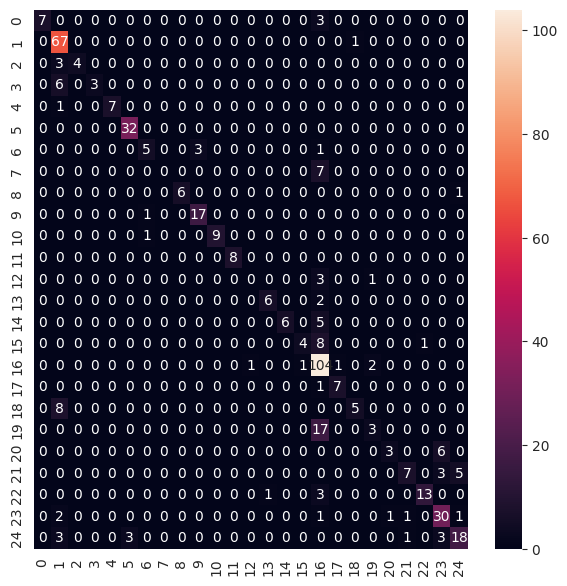

In [ ]:
from  sklearn.metrics  import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix.
import itertools
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1d',)


In [ ]:
encoder.inverse_transform([16,1])

array(['Project Manager', 'Data Analyst'], dtype=object)

In [ ]:
df_skills['Job_title'].value_counts()

Project Manager               519
Data Analyst                  418
Software Developer            140
Embedded Software Engineer    120
Software Engineer             120
Senior Data Analyst            93
Senior Project Manager         86
Management Accountant          78
Senior Software Engineer       76
Site Manager                   71
Project Coordinator            71
Finance Manager                59
DevOps Engineer                55
Project Engineer               54
Project Administrator          51
Account Manager                50
IT Project Manager             48
Senior Software Developer      43
Marketing Manager              43
Mechanical Design Engineer     42
Data Scientist                 38
Programme Manager              37
Data Engineer                  37
IT Support Engineer            36
Quantity Surveyor              35
Name: Job_title, dtype: int64

## Fine-Tuning with Grid Search

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search  = GridSearchCV(rf_classifier,param_grid,cv=3,scoring = 'f1_macro')
grid_search.fit(x_train_tfidf,y_train)
best_parms = grid_search.best_params_
print(f'Best Hyperparameters: {best_parms}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(x_test_tfidf)
# Evaluate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best Model: {accuracy_best:.2f}')

# Print classification report for the best model
print(classification_report(y_test, y_pred_best))

Accuracy with Best Model: 0.77
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.74      0.99      0.85        68
           2       1.00      0.29      0.44         7
           3       1.00      0.33      0.50         9
           4       1.00      0.88      0.93         8
           5       0.94      1.00      0.97        32
           6       1.00      0.44      0.62         9
           7       0.00      0.00      0.00         7
           8       1.00      0.86      0.92         7
           9       0.82      1.00      0.90        18
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       0.50      0.25      0.33         4
          13       1.00      0.62      0.77         8
          14       0.88      0.64      0.74        11
          15       0.88      0.54      0.67        13
          16       0.68      0.95      0.79       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

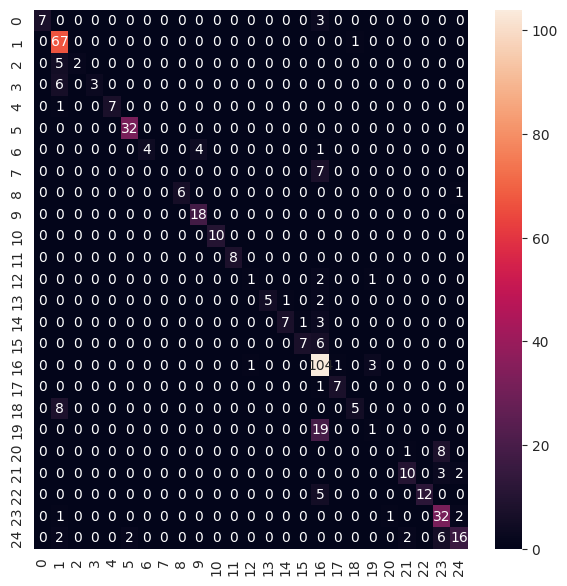

In [ ]:
from  sklearn.metrics  import confusion_matrix
# Step 4: Evaluate the classifier using various measures
# Function to plot confusion matrix.
import itertools
cm = confusion_matrix(y_test,y_pred_best)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1d')


#Experiment 2

In [ ]:
df_skills = pd.read_csv('/content/drive/MyDrive/data/job_data_with_skills_v1.csv')
df_resume = pd.read_csv('/content/drive/MyDrive/data/UpdatedResumeDataSet.csv')

In [ ]:
count_title = df_skills['Job_title'].value_counts().reset_index()
number_of_title = len(df_skills['Job_title'].unique())
print('number of jobs  = ', number_of_title)
print('*'*50)
count_title

number of jobs  =  10271
**************************************************


,index,Job_title
0,Project Manager,519
1,Data Analyst,418
2,Software Developer,140
3,Software Engineer,120
4,Embedded Software Engineer,120
...,...,...
10265,Senior Hardware Design Engineer,1
10266,nd Line Engineer Rollout Deployment,1
10267,Hydrogen Electrical Design Engineer,1
10268,Process Safety Engineer Process Engineer,1


In [ ]:
columns = count_title['index'][0:50]
columns = list(columns.values)
df_skills = df_skills[df_skills['Job_title'].isin(columns)]
df_skills

,Job_title,Job_link,Job_description,Keyword,skills,way_2_skills,combined
0,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,We looking DevOps Engineer join team develop s...,scrab_ddata,"['engineer', 'unwanted traffic', 'infrastructu...","['System', 'Analyze', 'Policies', 'Debugging',...","['engineer', 'unwanted traffic', 'infrastructu..."
1,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Who We Are We owned funded one Egypt renowned ...,scrab_ddata,"['perspectives', 'strong focus scalability sec...","['Technical', 'Linux', 'Workflow', 'Lifecycle'...","['perspectives', 'strong focus scalability sec..."
2,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Wind IS Company Oracle Partner Egypt KSA UAE h...,scrab_ddata,"['development', 'engineer', 'Job Requirements ...","['System', 'Website', 'Design', 'Engineering',...","['development', 'engineer', 'Job Requirements ..."
4,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,About Axis We believe financial services acces...,scrab_ddata,['Jenkins CD Bambop CircleCI Git Action Gitlab...,"['Automation', 'Ansible', 'Docker', 'Security'...",['Jenkins CD Bambop CircleCI Git Action Gitlab...
5,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Envision Employment Solutions currently look D...,scrab_ddata,"['DevOps Engineer role', 'repeat occurrences',...","['Automation', 'System', 'Docker', 'Engineerin...","['DevOps Engineer role', 'repeat occurrences',..."
...,...,...,...,...,...,...,...
16078,Senior Quantity Surveyor,NaN,Apply Senior Quantity Surveyor North UK Manche...,it_job_data,['excellent benefits package Benefits Package ...,"['Plan', 'Travel', 'Construction', 'Tomorrow']",['excellent benefits package Benefits Package ...
16131,Software Engineer,NaN,Design develop test deploy maintain improve so...,google_job_skills,"['development', 'Unix Linux', 'test', 'limited...","['Security', 'Design', 'Engineering', 'Coding'...","['development', 'Unix Linux', 'test', 'limited..."
16234,Software Engineer,NaN,Design develop test deploy maintain improve so...,google_job_skills,"['development', 'Unix Linux', 'test', 'limited...","['Security', 'Design', 'Computer science', 'En...","['development', 'Unix Linux', 'test', 'limited..."
16285,Software Engineer,NaN,Design develop test deploy maintain improve so...,google_job_skills,"['development', 'Python JavaScript Go Developm...","['Machine learning', 'Design', 'Engineering', ...","['development', 'Python JavaScript Go Developm..."


In [ ]:
df_skills['combined'] = df_skills.apply(lambda row : ast.literal_eval(row['skills']) +ast.literal_eval(row['way_2_skills']),axis =1)
#modeling
df_skills['combined'] = df_skills['combined'].apply(lambda row : ' '.join(row))
df_skills.head()

,Job_title,Job_link,Job_description,Keyword,skills,way_2_skills,combined
0,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,We looking DevOps Engineer join team develop s...,scrab_ddata,"['engineer', 'unwanted traffic', 'infrastructu...","['System', 'Analyze', 'Policies', 'Debugging',...",engineer unwanted traffic infrastructure vulne...
1,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Who We Are We owned funded one Egypt renowned ...,scrab_ddata,"['perspectives', 'strong focus scalability sec...","['Technical', 'Linux', 'Workflow', 'Lifecycle'...",perspectives strong focus scalability security...
2,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Wind IS Company Oracle Partner Egypt KSA UAE h...,scrab_ddata,"['development', 'engineer', 'Job Requirements ...","['System', 'Website', 'Design', 'Engineering',...",development engineer Job Requirements BSc tech...
4,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,About Axis We believe financial services acces...,scrab_ddata,['Jenkins CD Bambop CircleCI Git Action Gitlab...,"['Automation', 'Ansible', 'Docker', 'Security'...",Jenkins CD Bambop CircleCI Git Action Gitlab B...
5,DevOps Engineer,https://eg.linkedin.com/jobs/view/devops-engin...,Envision Employment Solutions currently look D...,scrab_ddata,"['DevOps Engineer role', 'repeat occurrences',...","['Automation', 'System', 'Docker', 'Engineerin...",DevOps Engineer role repeat occurrences closel...


In [ ]:
from imblearn.over_sampling import SMOTE
x = df_skills['combined']
y = df_skills['Job_title']
#use one-hot encoding to convert categorical labels to numerical form
encoder = LabelEncoder()
y_encoder = encoder.fit_transform(y.values.reshape(-1,1))
x_train,x_test,y_train,y_test = train_test_split(x,y_encoder,test_size = 0.2,random_state =123,stratify=y_encoder )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
vectorizer1 = TfidfVectorizer(stop_words='english',max_features=500)
x_train_tfidf = vectorizer1.fit_transform(x_train)
x_test_tfidf = vectorizer1.transform(x_test)

In [ ]:
x_train_tfidf.shape

(2461, 500)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_tfidf, y_train)
X_resampled.shape

(20750, 500)

In [ ]:

rf_classifier = RandomForestClassifier(class_weight = 'balanced',n_estimators=20,max_depth=8,random_state=123)
#multi_output_classifier = MultiOutputClassifier(rf_classifier)
rf_classifier.fit(X_resampled,y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=20,
                       random_state=123)

In [ ]:
y_pred = rf_classifier.predict(X_resampled)
accuracy = accuracy_score(y_resampled, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [ ]:
y_pred = rf_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.48


In [ ]:
y_test[0:5]

array([35, 33, 35, 44, 47])

In [ ]:
y_pred[0:5]

array([ 1, 34, 30, 46,  8])

# best 1


In [ ]:
rf_classifier = RandomForestClassifier(class_weight = 'balanced',n_estimators=200,max_depth=None,min_samples_leaf=1,min_samples_split=2,random_state=123)
#multi_output_classifier = MultiOutputClassifier(rf_classifier)
rf_classifier.fit(X_resampled,y_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=123)

In [ ]:
y_pred = rf_classifier.predict(X_resampled)
accuracy = accuracy_score(y_resampled, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
y_pred = rf_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [ ]:
from sklearn.metrics import make_scorer, f1_score
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
custom_scorer = make_scorer(f1_score, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring=custom_scorer)
grid_search.fit(X_resampled,y_resampled)
best_parms = grid_search.best_params_
print(f'Best Hyperparameters: {best_parms}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(x_test_tfidf)
# Evaluate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best Model: {accuracy_best:.2f}')

# Print classification report for the best model
print(classification_report(y_test, y_pred_best))

Accuracy with Best Model: 0.76
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.71      1.00      0.83         5
           2       1.00      0.50      0.67         4
           3       1.00      0.43      0.60         7
           4       0.71      0.83      0.77         6
           5       0.83      1.00      0.91         5
           6       0.83      0.83      0.83         6
           7       1.00      0.80      0.89         5
           8       0.76      0.96      0.85        84
           9       0.57      1.00      0.73         4
          10       0.75      0.86      0.80         7
          11       1.00      1.00      1.00         8
          12       0.59      0.91      0.71        11
          13       0.80      0.57      0.67         7
          14       1.00      0.96      0.98        24
          15       1.00      0.25      0.40         4
          16       0.85      0.92      0.88       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. Random Forest:

   ## - Advantages:

    1. Reduces overfitting compared to individual decision trees.
    2. Provides feature importance.
    3. Can handle large amounts of data with higher dimensionality.
    4. Can capture complex relationships in data.
    5. Handle both numerical and categorical data well.
  ##  - Disadvantages:

    1. Complexity and lack of interpretability compared to a single decision   tree.
 ##   - Considerations:
    1. May be overkill for smaller datasets.


1. Random Forest can be sensitive to imbalanced data, particularly when it comes to classification tasks. The issue arises because Random Forest, like many machine learning algorithms, tends to be biased towards the majority class
## - Here are some considerations regarding Random Forest and imbalanced data:

  1. Biased Towards Majority Class  : Random Forest tends to be biased towards the majority class since it constructs decision trees based on the most frequently occurring class.

  2. Impact on Tree Construction : In the early stages of constructing decision trees, the algorithm may prioritize the majority class, leading to trees that are more tailored to recognizing instances of the majority class.

  3. Limited Impact of Bagging : While bagging (bootstrap aggregating) helps reduce overfitting, it might not be as effective in mitigating the impact of imbalanced data on the individual decision trees








## Now I will try another model. But before doing that I want you to tell me why the accuracy of random forest is small?

1. Imbalanced Data:

    If your dataset has imbalanced class distribution, the model may be biased towards the majority class. In such cases, `accuracy` may not be a reliable metric. Consider using other metrics like precision, recall, F1-Score, or AUC-ROC that provide a more comprehensive view of model performance in imbalanced settings.
2. Hyperparameter Tuning:

    Random Forest has hyperparameters like the number of trees (n_estimators), maximum depth of trees (max_depth), minimum samples split (min_samples_split), and minimum samples leaf (min_samples_leaf). Suboptimal hyperparameter settings can impact model performance. Conduct hyperparameter tuning using techniques like grid search to find the best configuration.
3. Feature Importance:

    Check the importance of features in your Random Forest model. Some features might be more `informative than others`. If there are irrelevant or redundant features, removing them could improve performance.
4. Overfitting:

    `Random Forests are capable of capturing complex relationships in data, but this can lead to overfitting`, especially if the model is too complex (deep trees). `Try reducing the depth of the trees or increasing the minimum samples per leaf to mitigate overfitting`.
5. Data Quality:

6. Data Preprocessing:




1. Ensemble Methods Trade-offs:

      While Random Forests are robust, they may not perform well in all scenarios. Depending on the nature of your data, other ensemble methods or algorithms might be more suitable. Consider trying different models, such as Gradient Boosting or XGBoost, and compare their performance.
2. Cross-Validation:

      Use cross-validation to get a more robust estimate of your model's performance. Random Forests are less prone to overfitting, but cross-validation helps ensure that your results are consistent across different subsets of the data.

